In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2475 files belonging to 2 classes.


In [ ]:
class_names=dataset.class_names
class_names

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
EPOCHS=50
len(dataset)

In [ ]:
def dataset_partition(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    ds_size=len(ds)
    train_len=int(train_split*ds_size)
    val_len=int(val_split*ds_size)
    train_ds=ds.take(train_len)
    val_ds=ds.skip(train_len).take(val_len)
    test_ds=ds.skip(train_len).skip(val_len)
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=dataset_partition(dataset)

In [ ]:
len(train_ds),len(val_ds),len(test_ds)

In [ ]:
Train_ds=Train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [28]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
n_classes=2
model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history=model.fit(
train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001323FDC9310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000001323FDC9310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

Epoch 21/50
62/62 [==============================] - 16s 252ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0129 - val_accuracy: 0.9955
Epoch 22/50
62/62 [==============================] - 15s 248ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0161 - val_accuracy: 0.9955
Epoch 23/50
62/62 [==============================] - 15s 249ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.1210 - val_accuracy: 0.9464
Epoch 24/50
62/62 [==============================] - 16s 251ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 25/50
62/62 [==============================] - 16s 251ms/step - loss: 0.0204 - accuracy: 0.9949 - val_loss: 0.0404 - val_accuracy: 0.9911
Epoch 26/50
62/62 [==============================] - 15s 249ms/step - loss: 0.0222 - accuracy: 0.9913 - val_loss: 0.0498 - val_accuracy: 0.9732
Epoch 27/50
62/62 [==============================] - 15s 250ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0989 - val_accuracy:

In [32]:
scores=model.evaluate(test_ds)

9/9 [==============================] - 10s 78ms/step - loss: 0.0599 - accuracy: 0.9757


In [34]:
scores

[0.05993644520640373, 0.9756944179534912]

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

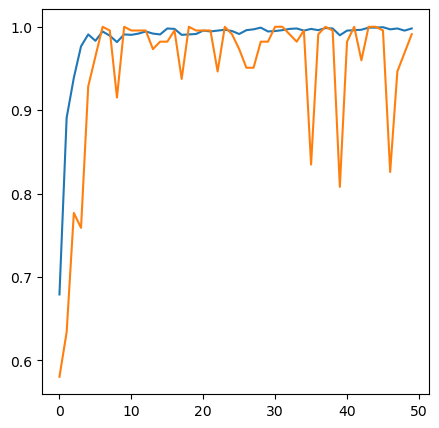

In [41]:
plt.figure(figsize=(5,5))
plt.plot(range(50),acc,label="Training Accuracy")
plt.plot(range(50),val_acc,label="Validation Accuracy")

Image to predict
Actual Label: Pepper__bell___healthy
1/1 [==============================] - 0s 44ms/step
predicted_label: Pepper__bell___healthy


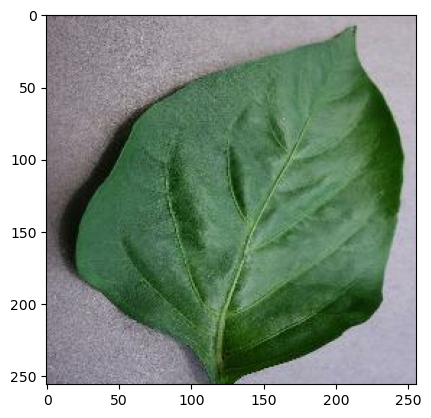

In [50]:
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    first_label=labels_batch[0].numpy()
    print("Image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[first_label])
    
    batch_predict=model.predict(images_batch)
    print("predicted_label:",class_names[np.argmax(batch_predict[0])])

In [51]:
def predict(model,image):
    image_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array=tf.expand_dims(image_array,0)
    predictions=model.predict(image_array)
    predicted_label=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_label,confidence


1/1 [==============================] - 0s 18ms/step


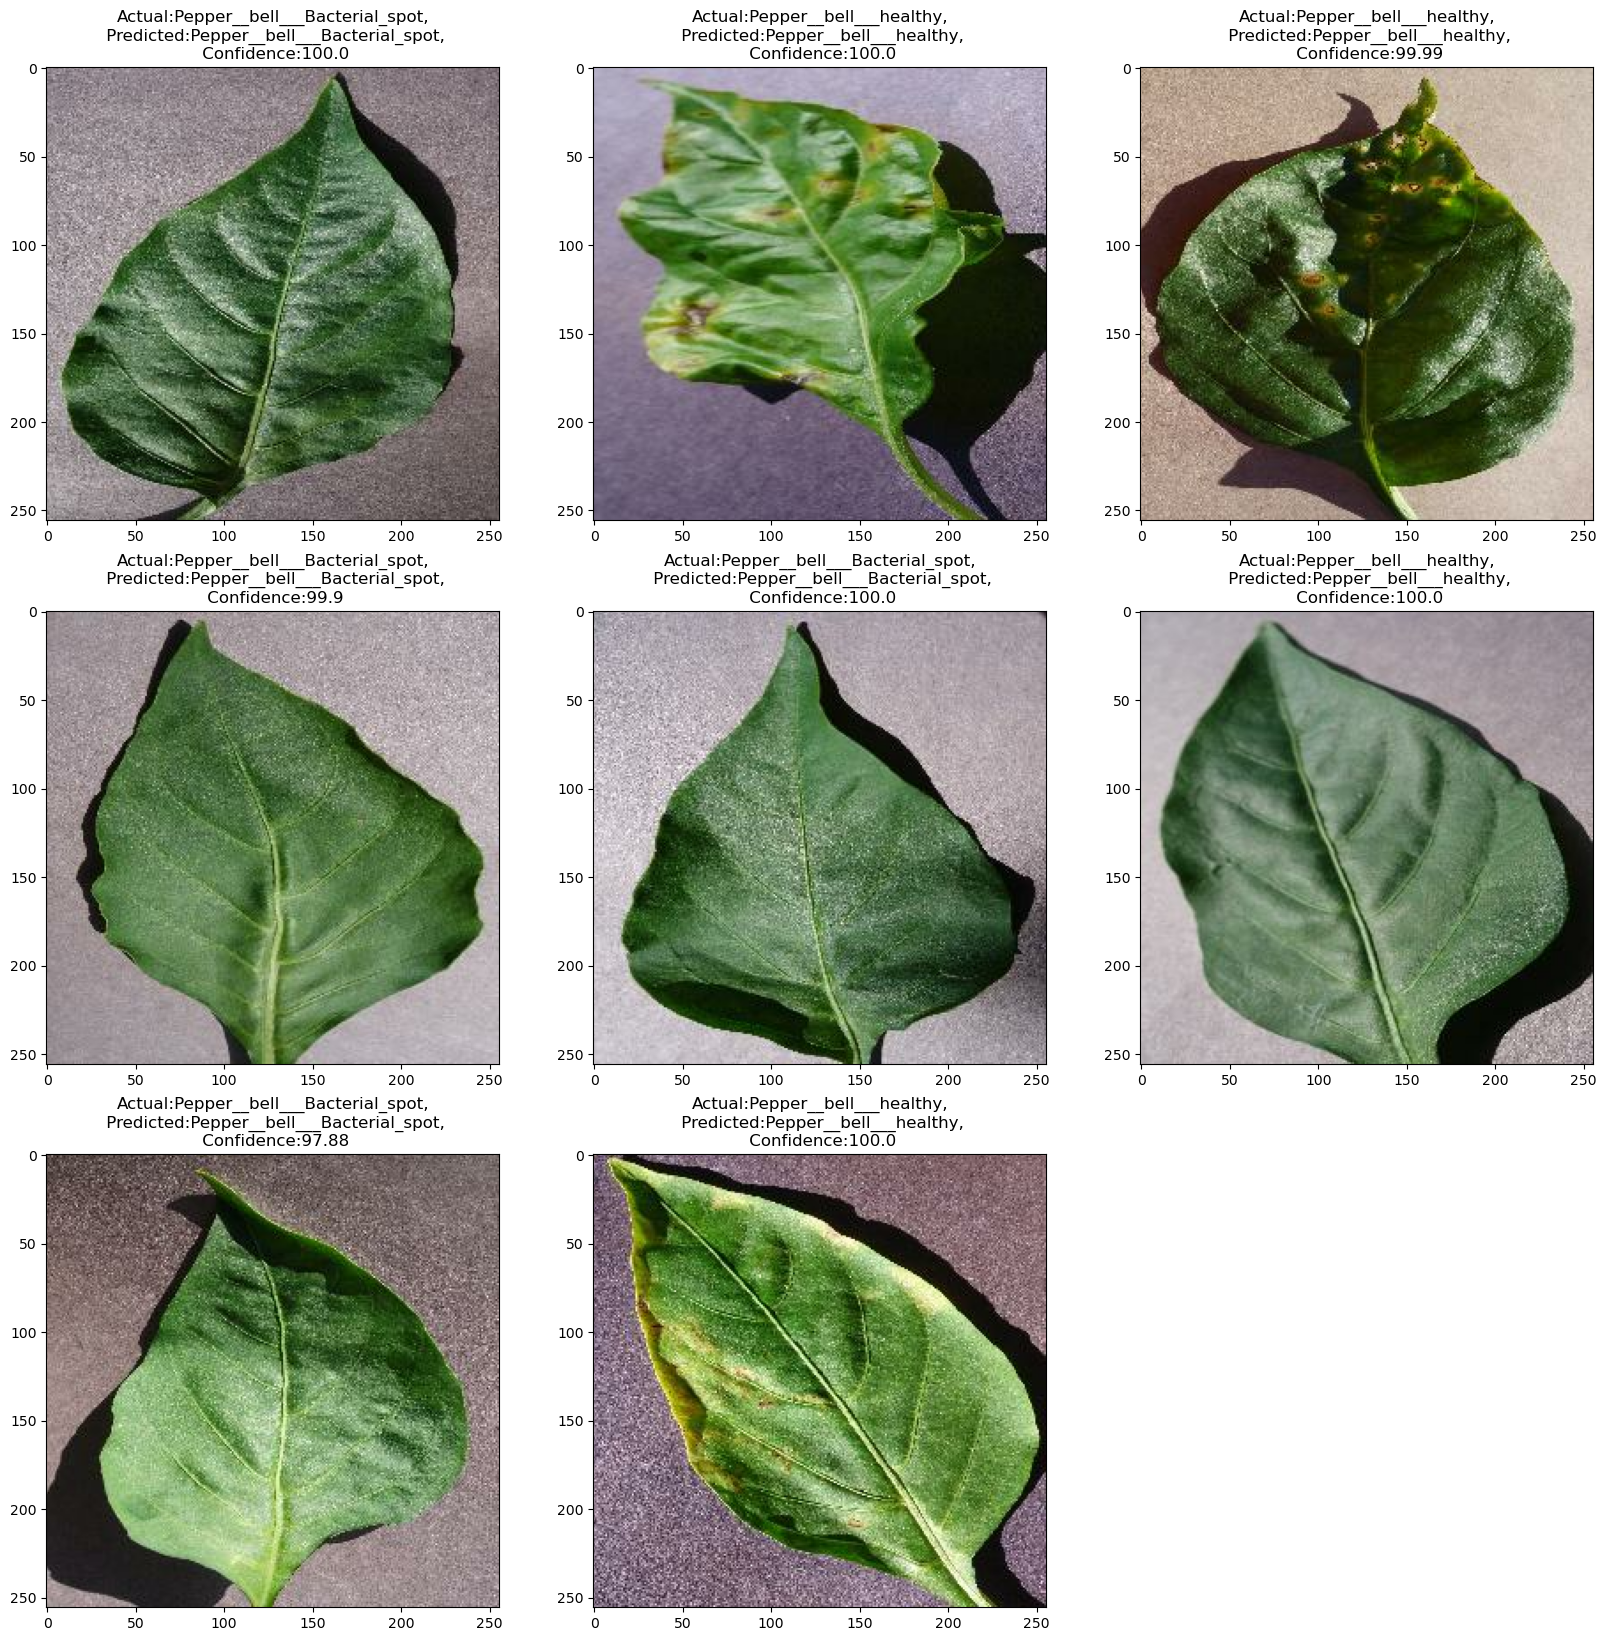

In [72]:
plt.figure(figsize=(20,20))
for images,labels_batch in test_ds.take(1):
    for i in range(8):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        pred_label,conf=predict(model,images[i].numpy())
        Actual_label=class_names[labels_batch[i]]
        plt.title(f"Actual:{Actual_label},\n Predicted:{pred_label},\n Confidence:{conf}")
        

In [74]:
model_version=1
model.save(f"../Model/{model_version}")

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001336ED5DF70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001336ED5DF70>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get 

INFO:tensorflow:Assets written to: ../Model/1\assets


INFO:tensorflow:Assets written to: ../Model/1\assets
